# Multiple linear regression - exercise

## Import the relevant libraries

In [1]:
%matplotlib inline
from random import randint
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import fbeta_score, make_scorer


import warnings
warnings.filterwarnings("ignore")



## Load the data

In [2]:
df = pd.read_csv("multiple_linear_regression.csv")
df.head(10)

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
5,1670,1,2.91
6,1764,2,3.00
7,1764,1,3.00
8,1792,2,3.01
9,1850,3,3.01


In [3]:
df.rename(columns = {'Rand 1,2,3' : 'Level'}, inplace = True)
df

,SAT,Level,GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


## Create the regression

### Declare the dependent and the independent variables

In [4]:
X = df.drop(['SAT'], axis=1)
y = df.SAT
print(X.columns, X.shape)

Index(['Level', 'GPA'], dtype='object') (84, 2)


### Explore the data

In [5]:
len(df.columns)

3

In [6]:
df.columns

Index(['SAT', 'Level', 'GPA'], dtype='object')

In [7]:
df.dtypes

SAT        int64
Level      int64
GPA      float64
dtype: object

In [8]:
df.isna().sum()

SAT      0
Level    0
GPA      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   Level   84 non-null     int64  
 2   GPA     84 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [10]:
df.describe()

,SAT,Level,GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [11]:
df.corr()

,SAT,Level,GPA
SAT,1.000000,-0.031722,0.637184
Level,-0.031722,1.000000,-0.046224
GPA,0.637184,-0.046224,1.000000


<AxesSubplot:>

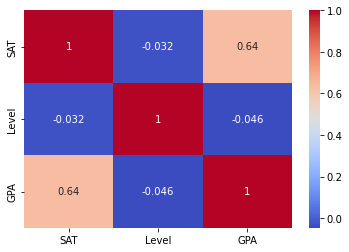

In [12]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

In [13]:
df.skew(axis=1, skipna=True)

0     1.732047
1     1.732050
2     1.732050
3     1.732051
4     1.732049
        ...   
79    1.732050
80    1.732038
81    1.732050
82    1.732039
83    1.732046
Length: 84, dtype: float64

In [14]:
df.skew(axis=0, skipna=True)

SAT      0.042542
Level   -0.115585
GPA     -1.103013
dtype: float64

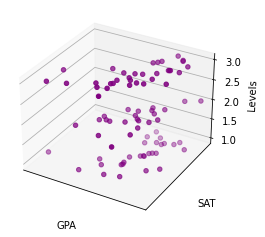

In [15]:

fig = plt.figure()
#fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['GPA'],df['SAT'],df['Level'],c='Purple')
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Levels')
#plt.show()


plt.xticks(())
plt.yticks(())

plt.show()

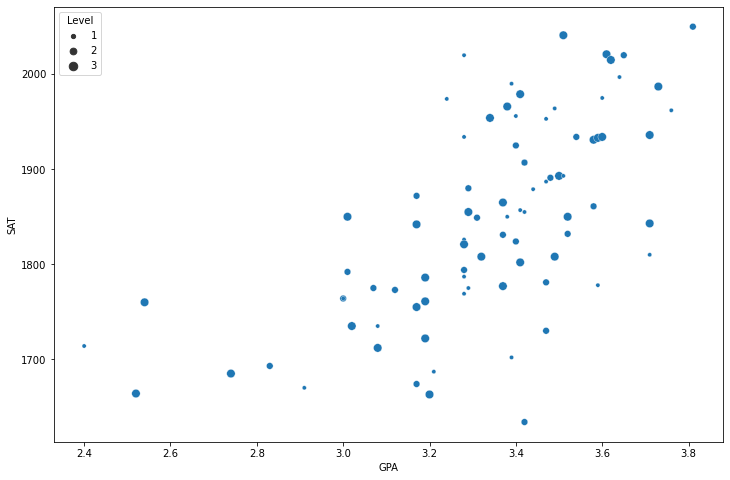

In [16]:
plt.figure(figsize= (12,8))
sns.scatterplot( x = 'GPA', y = 'SAT',  size = 'Level', data = df)
plt.show()

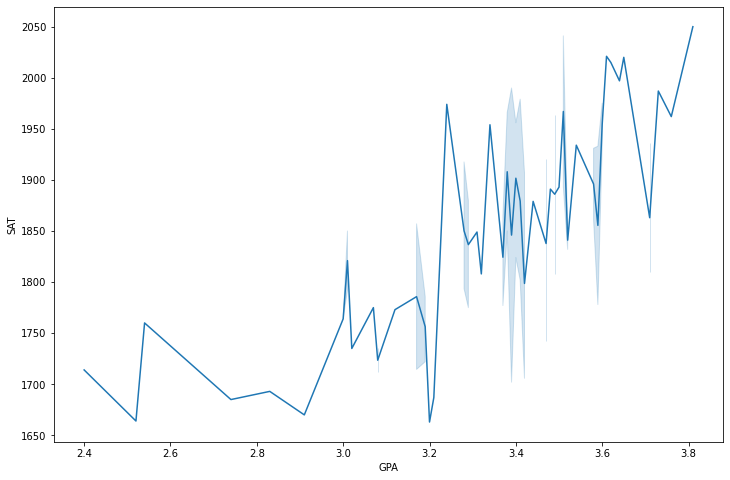

In [17]:
plt.figure(figsize= (12,8))
sns.lineplot( x = 'GPA', y = 'SAT', data = df)
plt.show()

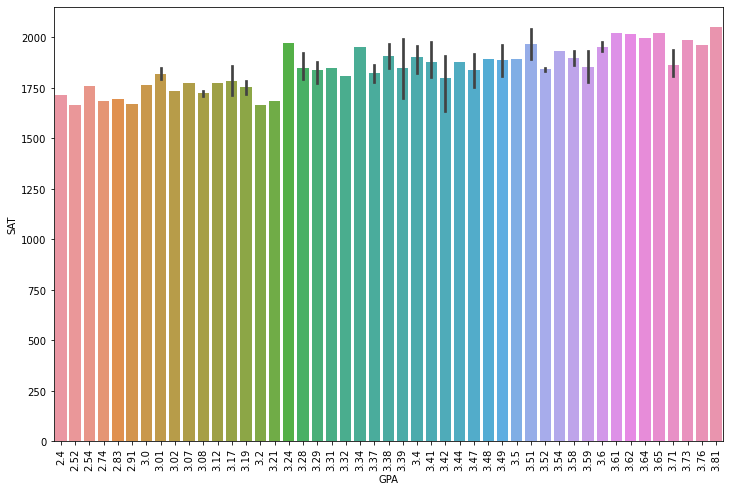

In [18]:
plt.figure(figsize= (12,8))
sns.barplot( x = 'GPA', y = 'SAT', data = df)
plt.xticks(rotation=90)
plt.show()

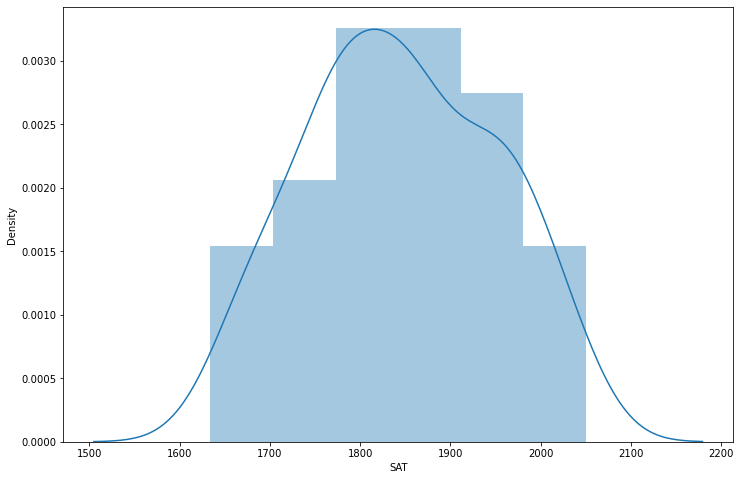

In [19]:
plt.figure(figsize= (12,8))
sns.distplot(df['SAT'])
plt.show()

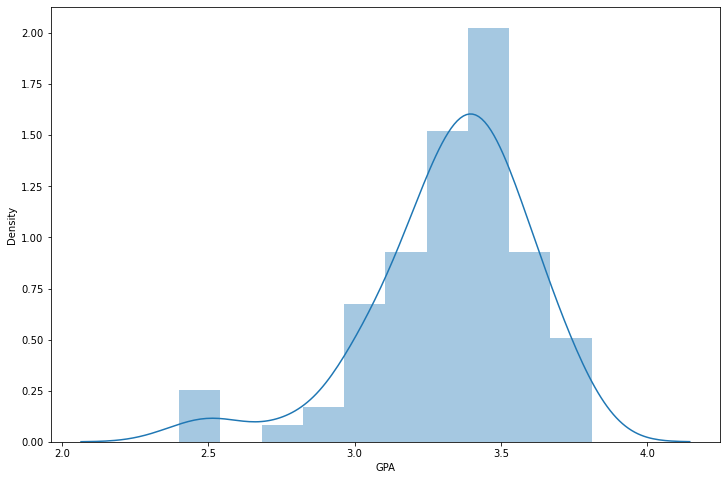

In [20]:
plt.figure(figsize= (12,8))
sns.distplot(df['GPA'])
plt.show()

In [21]:
df['SAT'].skew()

0.04254218795820412

In [22]:
df['GPA'].skew()

-1.1030128014960763

In [23]:
df_new = df.copy()
Level_scaler = StandardScaler()
SAT_scaler = StandardScaler()
GPA_scaler = StandardScaler()
Level_scale = Level_scaler.fit(df_new[['Level']])
SAT_scale = SAT_scaler.fit(df_new[['SAT']])
GPA_scale = GPA_scaler.fit(df_new[['GPA']])
df_new.loc[:, ['Level']] = Level_scale.transform(df_new[['Level']])
df_new.loc[:, ['SAT']] = SAT_scale.transform(df_new[['SAT']])
df_new.loc[:, ['GPA']] = GPA_scale.transform(df_new[['GPA']])

In [24]:
X = df_new.drop(['SAT'], axis=1)
y = df_new.SAT
print(X.columns, X.shape)

Index(['Level', 'GPA'], dtype='object') (84, 2)


### Regression itself

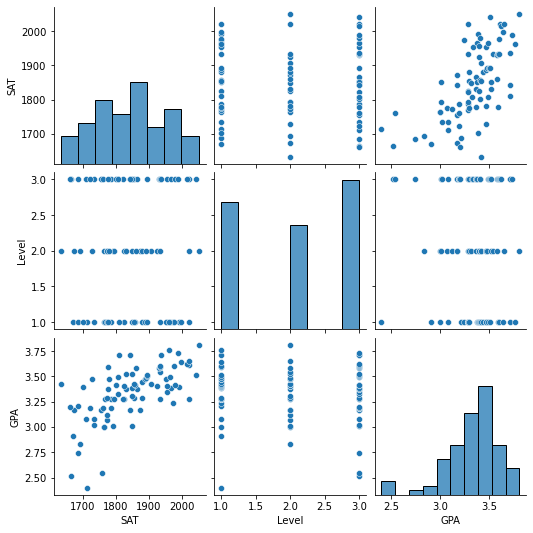

In [25]:
sns.pairplot(df) 

Coefficients: 
 [0.03107818 0.65701742]
Residual sum of squares: 0.36
Variance score: 0.56
Intercept: 
 0.00777553796240113
R Squared Score: 
 0.3695967752104806


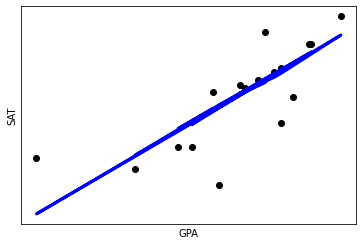

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients (slope)
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
# The intercept
print('Intercept: \n', regr.intercept_)
 #R Squared Score
print('R Squared Score: \n', regr.score(X_train, y_train))


y_pred = regr.predict(X_test)
# Plot outputs

fig, ax = plt.subplots()

plt.scatter(X_test.GPA, y_test, color="black")
plt.plot(X_test.GPA, y_pred, color="blue", linewidth=3)
ax.set_xlabel('GPA')
ax.set_ylabel("SAT")
plt.xticks(())
plt.yticks(())

plt.show()

In [27]:
y_pred =  pd.DataFrame(y_pred)
y_pred = SAT_scale.inverse_transform(y_pred)
y_pred

array([[1917.86370932],
       [1606.84593686],
       [1881.19446595],
       [1816.72358774],
       [1778.78414354],
       [1915.33520628],
       [1771.21053303],
       [1809.13807862],
       [1719.37027142],
       [1893.83698114],
       [1859.70813941],
       [1859.69624081],
       [1840.73841731],
       [1950.73424884],
       [1877.39576208],
       [1869.81025296],
       [1839.4801151 ]])

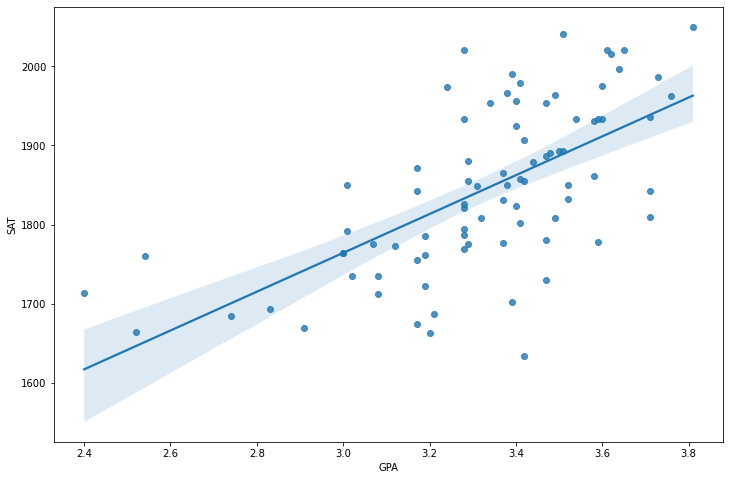

In [28]:
plt.figure(figsize= (12,8))
sns.regplot( x = 'GPA', y = 'SAT', data = df)
plt.show()

<Figure size 864x576 with 0 Axes>

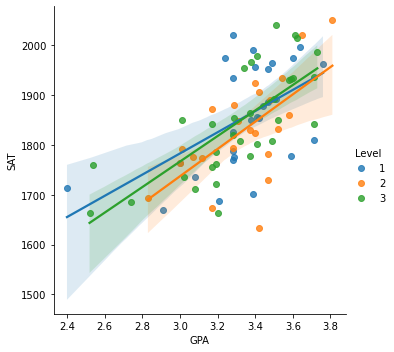

In [29]:
plt.figure(figsize= (12,8))
sns.lmplot( x = 'GPA', y = 'SAT', hue = 'Level', data = df)
plt.show()

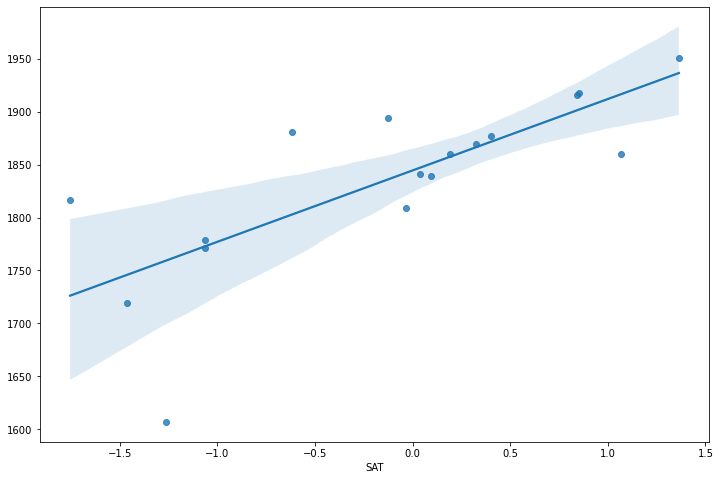

In [30]:
plt.figure(figsize= (12,8))
sns.regplot( x = y_test, y = y_pred , data = df)
plt.show()

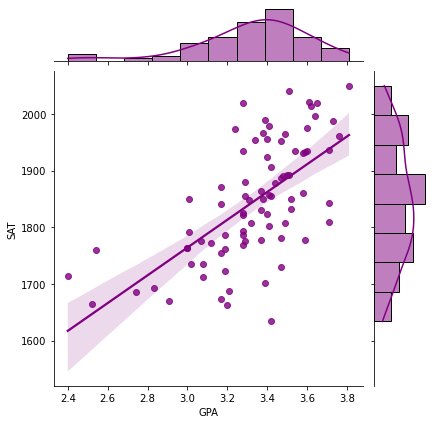

In [31]:
 sns.jointplot(x = 'GPA',  y = 'SAT', data = df, kind = 'reg',color='purple')

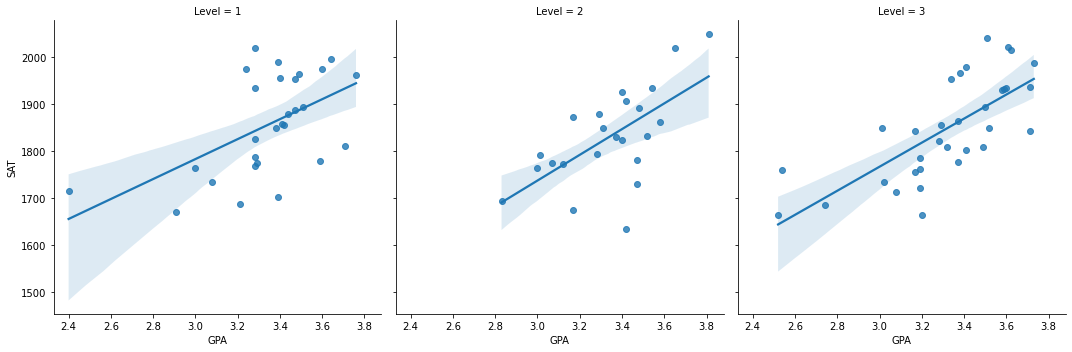

In [32]:
sns.lmplot(x = 'GPA',  y = 'SAT', data = df, col= 'Level') #you can add pallete to any lmplot too

In [33]:
profile = ProfileReport(df, title="Creditcard Fraud Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
profile.to_file(output_file="Profile Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]